In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

Job Title   Salary  \
0             Data Scientist   53-91    
1  Healthcare Data Scientist  63-112    
2             Data Scientist   80-90    
3             Data Scientist   56-97    
4             Data Scientist  86-143    

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded           Ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  Avg_salary Age                              company_txt Job_state  \
0       72.0  49                      Tecolote Research\n        NM   
1       87.5  38  University of Maryland Medical System\n        MD   
2       85.0  12                                KnowBe4\n        FL   
3       76.5  57                                   PNNL\n        WA   
4      114.5  24                     Affinity Solutions\n        NY   

   Same_satet  Pythony  Rny  Spark  aws  excel  
0           0        1    0      0    0      1  
1           0        1    0      0    0      0  
2           1        1    0      1    0      1  
3           1        1    0      0    0      0  
4           1        1    0      0    0      1  

[5 rows x 28 columns]

In [4]:
df.columns

Index(['Job Title', 'Salary', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer_provided',
       'Min_salary', 'Max_salary', 'Avg_salary', 'Age', 'company_txt',
       'Job_state', 'Same_satet', 'Pythony', 'Rny', 'Spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_siplified(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mlea'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniorty(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jenior'
    else:
        return 'na'

In [6]:
df['Job_simple'] = df['Job Title'].apply(title_siplified)
df['Job_simple'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mlea               22
manager            22
director           14
Name: Job_simple, dtype: int64

In [7]:
df['seniorty'] = df['Job Title'].apply(seniorty)
df['seniorty'].value_counts()

na        520
senior    220
jenior      2
Name: seniorty, dtype: int64

In [8]:
df['Job_state'] = df['Job_state'].apply(lambda x: x.replace('Los Angeles', 'CA'))
df['Job_state'].value_counts()

 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 IN     10
 WI     10
 UT     10
 AZ      9
 MO      9
 AL      8
 GA      6
 MI      6
 KY      6
 DE      6
 IA      5
 CT      5
 OR      4
 LA      4
 NE      4
 NM      3
 KS      3
 ID      2
 MN      2
 SC      1
 RI      1
Name: Job_state, dtype: int64

In [9]:
df['Description_len'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x: x.Min_salary*2 if x.Hourly == 1 else x.Min_salary, axis =1)

In [12]:
df['max_salary'] = df.apply(lambda x: x.Max_salary*2 if x.Hourly == 1 else x.Max_salary, axis = 1)

In [13]:
df[df.Hourly == 1][['Hourly', 'min_salary', 'max_salary']]

Hourly  min_salary  max_salary
165       1          34          48
177       1          42          68
197       1          36          50
202       1          42          68
210       1          30          50
246       1          34          48
271       1          42          68
337       1          36          50
345       1          48          78
357       1          42          68
363       1          50          56
408       1          42          58
409       1          20          34
492       1          36          50
509       1          48          78
533       1          42          68
542       1          50          56
617       1          42          58
618       1          20          34
645       1          54          94
666       1          36          50
682       1          48          78
711       1          42          68
724       1          50          56

In [14]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('/n', ''))

In [15]:
df.describe()

Rating      Founded      Hourly  Employer_provided  Min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.068733   
std      0.801210   497.183763    0.177034           0.149721   31.869282   
min     -1.000000    -1.000000    0.000000           0.000000   10.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       Max_salary  Avg_salary         Age  Same_satet     Pythony         Rny  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   127.183288  100.626011   48.456873    0.557951    0.528302    0.002695   
std     46.909006   38.855948   53.900445    0.496965    0.499535    0.051882   
min     16.000000   13.500000   -1.000000    0.000000    0.000000    0.000000   
25%     96.000000   73.500000   13.000000    0.000000    0.000000    0.000000   
50%    124.000000   97.500000   26.000000    1.000000    1.000000    0.000000   
75%    155.000000  122.500000   61.000000    1.000000    1.000000    0.000000   
max    306.000000  254.000000  278.000000    1.000000    1.000000    1.000000   

            Spark         aws       excel  Description_len    num_comp  \
count  742.000000  742.000000  742.000000       742.000000  742.000000   
mean     0.225067    0.237197    0.522911      3869.545822    1.053908   
std      0.417908    0.425651    0.499812      1521.495868    1.384239   
min      0.000000    0.000000    0.000000       407.000000    0.000000   
25%      0.000000    0.000000    0.000000      2801.000000    0.000000   
50%      0.000000    0.000000    1.000000      3731.000000    0.000000   
75%      0.000000    0.000000    1.000000      4740.000000    3.000000   
max      1.000000    1.000000    1.000000     10051.000000    4.000000   

       min_salary  max_salary  
count  742.000000  742.000000  
mean    74.719677  128.149596  
std     30.980593   45.220324  
min     15.000000   16.000000  
25%     52.000000   96.000000  
50%     69.500000  124.000000  
75%     91.000000  155.000000  
max    202.000000  306.000000

<AxesSubplot:>

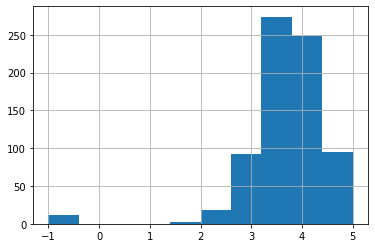

In [16]:
df.Rating.hist()

<AxesSubplot:>

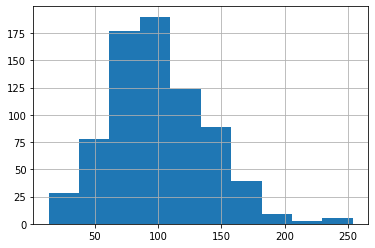

In [17]:
df.Avg_salary.hist()

<AxesSubplot:>

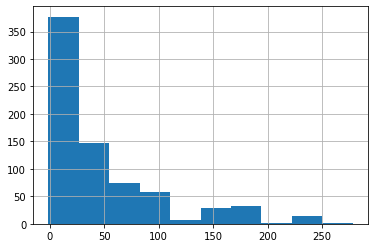

In [18]:
df.Age.hist()

<AxesSubplot:>

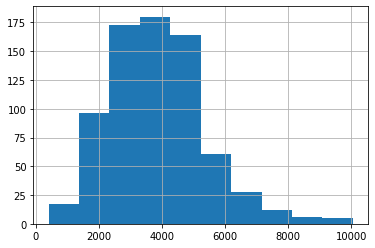

In [19]:
df.Description_len.hist()

<AxesSubplot:>

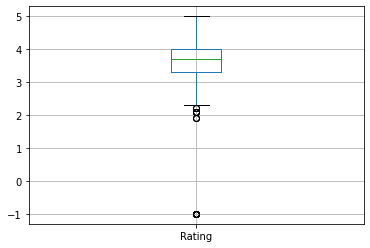

In [20]:
df.boxplot(column = 'Rating')

In [21]:
df[['Age', 'Avg_salary', 'Rating', 'Description_len']].corr()

Age  Avg_salary    Rating  Description_len
Age              1.000000    0.019492  0.024665         0.164461
Avg_salary       0.019492    1.000000  0.013492         0.078808
Rating           0.024665    0.013492  1.000000        -0.012281
Description_len  0.164461    0.078808 -0.012281         1.000000

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

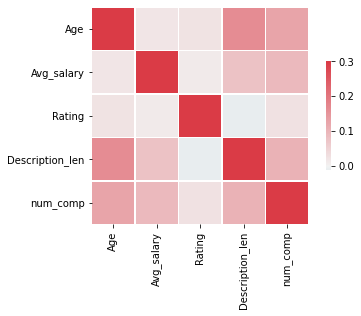

In [23]:
sns.heatmap(df[['Age','Avg_salary','Rating','Description_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
df.columns

Index(['Job Title', 'Salary', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer_provided',
       'Min_salary', 'Max_salary', 'Avg_salary', 'Age', 'company_txt',
       'Job_state', 'Same_satet', 'Pythony', 'Rny', 'Spark', 'aws', 'excel',
       'Job_simple', 'seniorty', 'Description_len', 'num_comp', 'min_salary',
       'max_salary'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Sector', 'Ownership', 'Industry', 'Revenue', 'company_txt', 'Job_state', 'aws', 'excel', 'Same_satet', 'seniorty', 'Job_simple', 'Spark']]

chart for Location : tottal 20


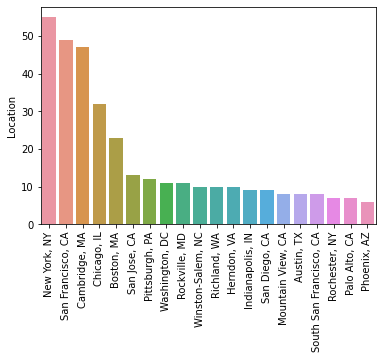

chart for Headquarters : tottal 20


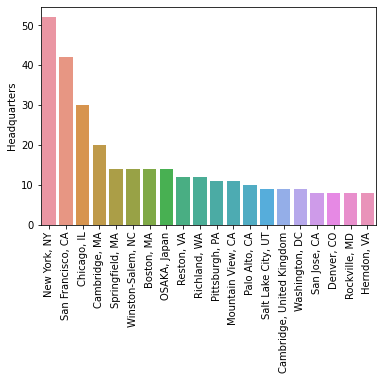

chart for Size : tottal 9


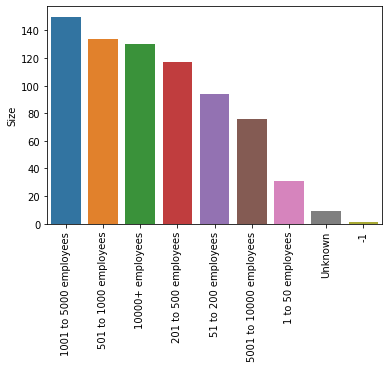

chart for Sector : tottal 20


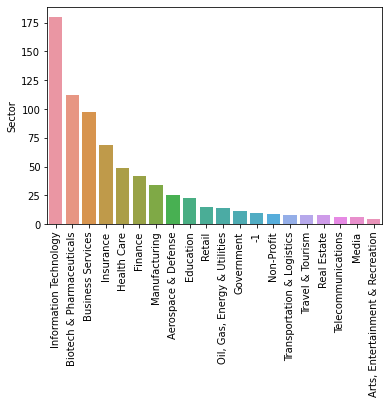

chart for Ownership : tottal 11


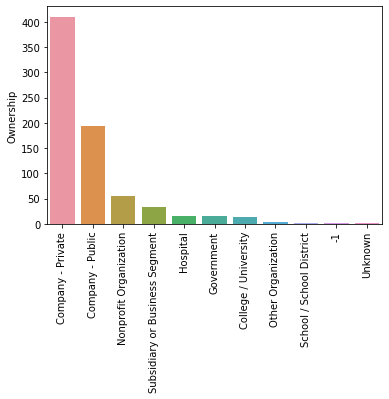

chart for Industry : tottal 20


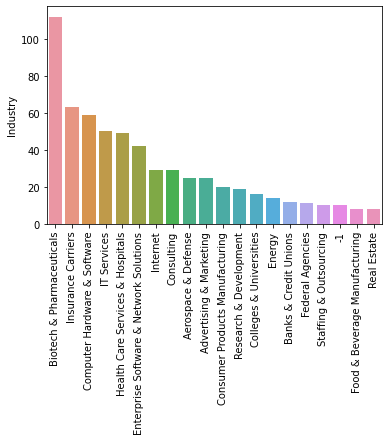

chart for Revenue : tottal 14


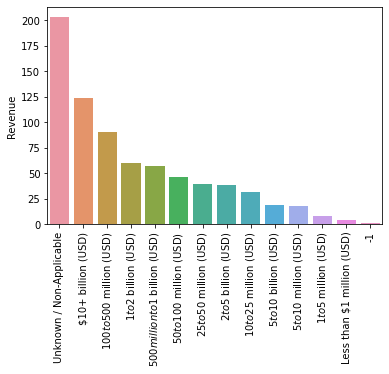

chart for company_txt : tottal 20


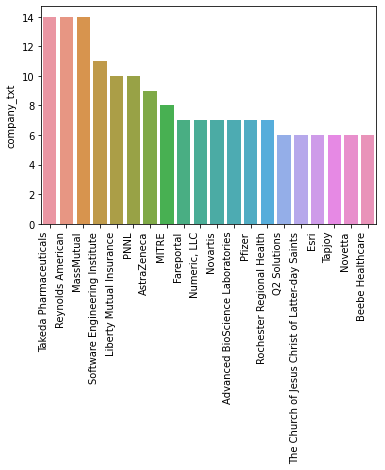

chart for Job_state : tottal 20


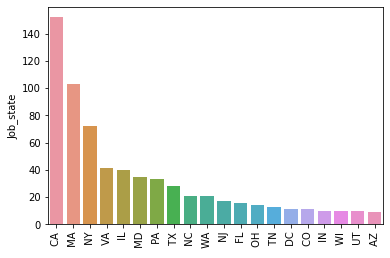

chart for aws : tottal 2


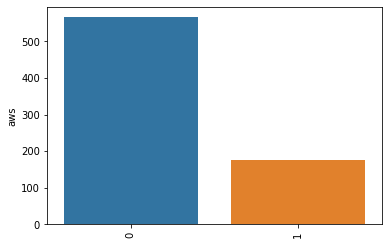

chart for excel : tottal 2


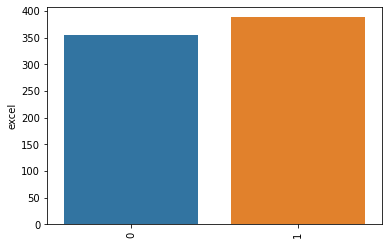

chart for Same_satet : tottal 2


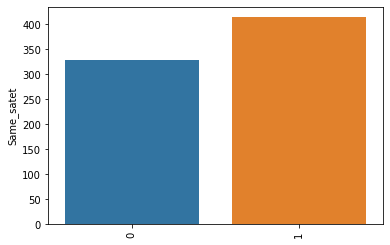

chart for seniorty : tottal 3


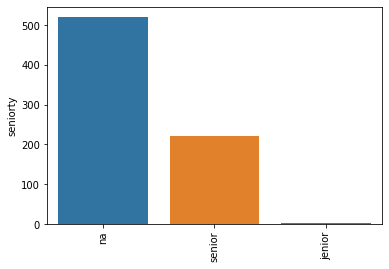

chart for Job_simple : tottal 7


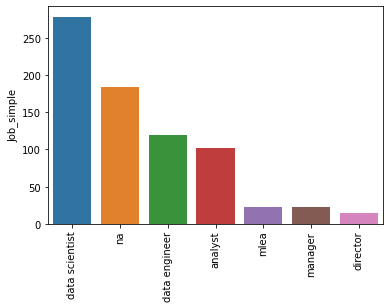

chart for Spark : tottal 2


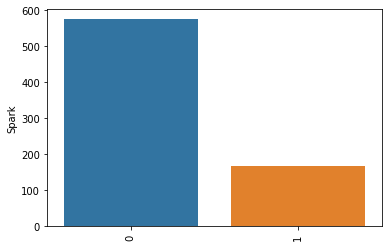

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("chart for %s : tottal %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [27]:
pd.pivot_table(df, index = 'Job_simple', values = 'Avg_salary')

Avg_salary
Job_simple                
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mlea            126.431818
na               84.853261

In [28]:
pd.pivot_table(df, index = ['Job_simple', 'seniorty'], values = 'Avg_salary')

Avg_salary
Job_simple     seniorty            
analyst        jenior     56.500000
               na         61.155405
               senior     79.092593
data engineer  na         96.701220
               senior    124.689189
data scientist jenior    106.500000
               na        107.043011
               senior    138.956522
director       na        168.607143
manager        na         84.022727
mlea           na        119.133333
               senior    142.071429
na             na         73.988189
               senior    109.061404

In [29]:
pd.pivot_table(df, index = ['Job_state', 'Job_simple', 'seniorty'], values= 'Avg_salary').sort_values('Job_state')

Avg_salary
Job_state Job_simple     seniorty            
 AL       analyst        na         62.200000
          data engineer  na         65.000000
          na             na         43.750000
 AZ       analyst        senior     55.000000
          data engineer  na         65.833333
...                                       ...
 WA       data scientist senior    124.312500
 WI       data scientist na        120.000000
                         senior    100.500000
          analyst        na         58.833333
          na             na         54.000000

[161 rows x 1 columns]

In [30]:
pd.pivot_table(df, index = ['Job_state', 'Job_simple', 'seniorty'], values= 'Avg_salary', aggfunc = 'count').sort_values('Job_state')

Avg_salary
Job_state Job_simple     seniorty            
 AL       analyst        na                 5
          data engineer  na                 1
          na             na                 2
 AZ       analyst        senior             1
          data engineer  na                 3
...                                       ...
 WA       data scientist senior             8
 WI       data scientist na                 2
                         senior             1
          analyst        na                 3
          na             na                 4

[161 rows x 1 columns]

In [31]:
pd.pivot_table(df[df.Job_simple == 'data scientist'], index = 'Job_state', values = 'Avg_salary').sort_values('Avg_salary', ascending = False)

Avg_salary
Job_state            
 DC        149.000000
 CA        142.522059
 UT        140.500000
 MO        127.666667
 IL        117.233333
 NC        117.000000
 NY        115.250000
 MA        113.750000
 WI        113.500000
 PA        113.333333
 MD        109.115385
 CO        108.666667
 VA        108.416667
 NJ        106.875000
 MI        106.625000
 OH        105.285714
 TX        100.730769
 WA         99.764706
 OR         98.500000
 FL         97.357143
 TN         96.000000
 IN         84.500000
 KY         84.000000
 CT         84.000000
 GA         81.333333
 NM         74.333333
 AZ         69.500000

In [32]:
pd.pivot_table(df, index = ['Job_simple', 'Employer_provided', 'Ownership'] , values = 'Avg_salary').sort_values('Avg_salary', ascending = False)

Avg_salary
Job_simple     Employer_provided Ownership                                 
mlea           0                 Subsidiary or Business Segment  232.500000
data scientist 1                 Company - Private               178.000000
director       0                 Company - Private               172.900000
                                 Company - Public                157.875000
mlea           0                 Company - Private               141.166667
data engineer  1                 Company - Private               132.500000
data scientist 0                 Subsidiary or Business Segment  127.571429
data engineer  0                 Subsidiary or Business Segment  123.800000
data scientist 0                 Company - Public                120.522727
mlea           0                 College / University            120.500000
data scientist 0                 Company - Private               117.708333
na             1                 -1                              117.500000
data engineer  0                 Company - Public                110.520000
na             0                 Company - Public                109.770833
data scientist 0                 College / University            105.500000
manager        0                 Company - Public                105.166667
data engineer  0                 Company - Private               103.037500
na             0                 Subsidiary or Business Segment   99.250000
data engineer  0                 Nonprofit Organization           98.187500
data scientist 0                 School / School District         96.000000
                                 Nonprofit Organization           92.950000
na             1                 Company - Private                90.222222
data scientist 0                 Government                       88.892857
na             1                 Nonprofit Organization           87.500000
data scientist 0                 Other Organization               87.500000
mlea           0                 Company - Public                 87.000000
na             0                 College / University             86.125000
manager        0                 Company - Private                85.133333
na             0                 Company - Private                83.426667
analyst        0                 Other Organization               72.500000
                                 Company - Public                 69.125000
                                 Company - Private                67.217742
manager        0                 Nonprofit Organization           64.000000
analyst        0                 School / School District         59.500000
                                 Nonprofit Organization           57.727273
                                 Subsidiary or Business Segment   54.666667
na             0                 Hospital                         54.000000
                                 Nonprofit Organization           50.571429
                                 Unknown                          39.500000
                                 Government                       20.000000

In [35]:
pd.pivot_table(df, index = ['Job_simple', 'seniorty', 'Pythony', 'Rny'], values= 'Avg_salary')

Avg_salary
Job_simple     seniorty Pythony Rny            
analyst        jenior   0       0     56.500000
               na       0       0     60.000000
                        1       0     64.000000
                                1     70.750000
               senior   0       0     65.576923
                        1       0     91.642857
data engineer  na       0       0    102.580645
                        1       0     93.127451
               senior   0       0    113.681818
                        1       0    129.346154
data scientist jenior   1       0    106.500000
               na       0       0    110.500000
                        1       0    106.125850
               senior   0       0    124.541667
                        1       0    144.044118
director       na       0       0    117.833333
                        1       0    206.687500
manager        na       0       0     76.875000
                        1       0    103.083333
mlea           na       1       0    119.133333
               senior   0       0    124.000000
                        1       0    166.166667
na             na       0       0     70.314286
                        1       0     91.522727
               senior   0       0    106.602273
                        1       0    117.384615

In [40]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Hourly', 'Employer_provided', 'Pythony', 'Rny', 'Spark', 'aws', 'excel', 'Description_len', 'Ownership', 'Avg_salary']]
for i in df_pivot.columns:
    if i == 'Avg_salary' : 
        break
    print(i)
    sort = pd.pivot_table(df_pivot, index = i, values = 'Avg_salary')
    print(sort)

Rating
        Avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          Avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

In [41]:
pd.pivot_table(df_pivot, index = 'Revenue', columns = 'Pythony', values = 'Avg_salary')

Pythony                                    0           1
Revenue                                                 
$1 to $2 billion (USD)             80.093750  113.420455
$1 to $5 million (USD)            102.000000  121.785714
$10 to $25 million (USD)           80.875000  119.843750
$10+ billion (USD)                102.393939  129.698276
$100 to $500 million (USD)         67.319149  100.068182
$2 to $5 billion (USD)             79.000000  106.886364
$25 to $50 million (USD)           79.166667   88.343750
$5 to $10 billion (USD)            74.888889  111.550000
$5 to $10 million (USD)           112.111111  140.111111
$50 to $100 million (USD)          74.071429  122.820000
$500 million to $1 billion (USD)   79.224138   95.035714
-1                                117.500000         NaN
Less than $1 million (USD)         98.500000  112.000000
Unknown / Non-Applicable           95.806452  111.500000